In [6]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 1. Hyper-parameters and random data

In [7]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# 2. Modeling

In [10]:
# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    tensor_x = torch.from_numpy(x_train)
    tensor_y = torch.from_numpy(y_train)
    
    # Forward pass
    output = model(tensor_x)
    loss = loss_fn(output, tensor_y)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 5.7855
Epoch [10/60], Loss: 2.4491
Epoch [15/60], Loss: 1.0975
Epoch [20/60], Loss: 0.5499
Epoch [25/60], Loss: 0.3281
Epoch [30/60], Loss: 0.2382
Epoch [35/60], Loss: 0.2018
Epoch [40/60], Loss: 0.1870
Epoch [45/60], Loss: 0.1810
Epoch [50/60], Loss: 0.1786
Epoch [55/60], Loss: 0.1776
Epoch [60/60], Loss: 0.1771


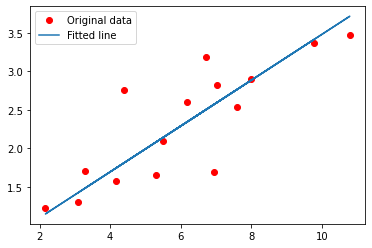

In [11]:
# Turn off gradients computation
with torch.no_grad():
  predicted = model(torch.from_numpy(x_train)).detach().numpy()
  # Plot the graph
  plt.plot(x_train, y_train, 'ro', label='Original data')
  plt.plot(x_train, predicted, label='Fitted line')
  plt.legend()
  plt.show()